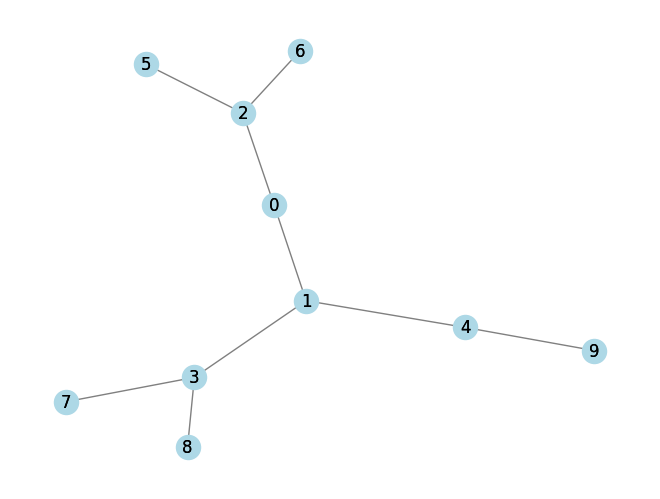

No common neighbor found between node 9 and node 7


In [145]:
import networkx as nx
import matplotlib.pyplot as plt

class HierarchicalGraph:
    def __init__(self, graph):
        self.graph = graph
        self.graph_dict = self.create_graph_dict()

    def create_graph_dict(self):
        """Создает словарь графа."""
        return {node: list(self.graph.neighbors(node)) for node in self.graph.nodes()}

    def find_path(self, node1, node2):
        """Ищет маршрут между двумя произвольными точками через общего соседа."""
        neighbors_node1 = set(self.graph_dict[node1])
        neighbors_node2 = set(self.graph_dict[node2])

        common_neighbors = neighbors_node1.intersection(neighbors_node2)
        
        if common_neighbors:
            common_neighbor = common_neighbors.pop()
            return [node1, common_neighbor, node2]
        else:
            return None

    def draw_graph(self, edge_labels=False):
        """Рисует начальный граф с метками узлов и ребер."""
        pos = nx.spring_layout(self.graph)
        nx.draw(self.graph, pos, with_labels=True, node_color='lightblue', edge_color='gray')
        
        # Метки узлов
        node_labels = {node: str(node) for node in self.graph.nodes()}
        nx.draw_networkx_labels(self.graph, pos, labels=node_labels)
        
        # Метки ребер
        if edge_labels:
            edge_labels = {(u, v): f'{u}-{v}' for u, v in self.graph.edges()}
            nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=edge_labels)
        
        plt.show()

    def draw_route(self, node1, node2):
        """Рисует маршрут между двумя точками через общего соседа."""
        path = self.find_path(node1, node2)
        
        if path:
            # Рисование графа
            pos = nx.spring_layout(self.graph)
            nx.draw(self.graph, pos, with_labels=True, node_color='lightblue', edge_color='gray')
            
            # Рисование пути
            path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
            nx.draw_networkx_edges(self.graph, pos, edgelist=path_edges, edge_color='red', width=2)
            nx.draw_networkx_nodes(self.graph, pos, nodelist=path, node_color='red')
            
            plt.show()
        else:
            print(f"No common neighbor found between node {node1} and node {node2}")

# Пример использования
graph = nx.turan_graph(20, 2)
graph = nx.full_rary_tree(2, 10)
hg = HierarchicalGraph(graph)

# Рисование начального графа с метками
hg.draw_graph()

# Рисование маршрута между двумя узлами
node1 = 9
node2 = 7
hg.draw_route(node1, node2)

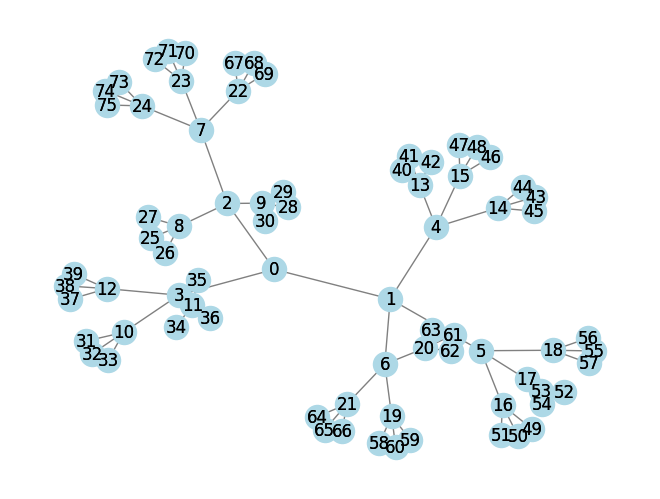

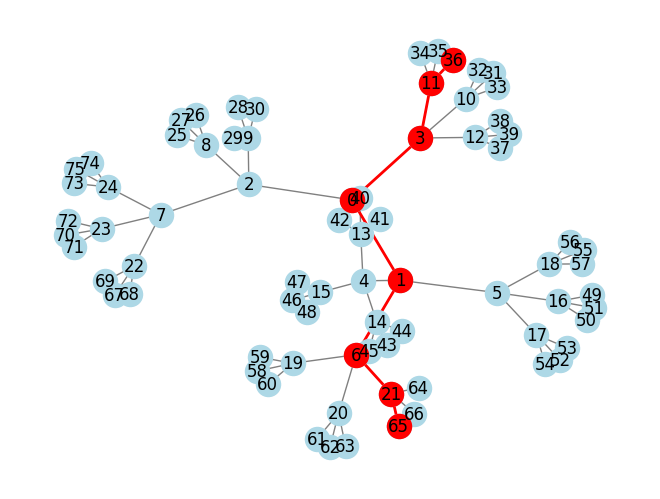

In [158]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

class HierarchicalGraph:
    def __init__(self, graph):
        self.graph = graph
        self.graph_dict = self.create_graph_dict()

    def create_graph_dict(self):
        """Создает словарь графа."""
        return {node: list(self.graph.neighbors(node)) for node in self.graph.nodes()}

    def find_path(self, node1, node2):
        """Ищет маршрут между двумя произвольными точками через общего соседа."""
        queue = deque([(node1, [node1])])
        visited = set()

        while queue:
            current_node, path = queue.popleft()

            if current_node in visited:
                continue

            visited.add(current_node)
            neighbors = self.graph_dict[current_node]

            for neighbor in neighbors:
                if neighbor == node2:
                    return path + [neighbor]
                queue.append((neighbor, path + [neighbor]))

        return None

    def draw_graph(self, edge_labels=False):
        """Рисует начальный граф с метками узлов и ребер."""
        pos = nx.spring_layout(self.graph)
        nx.draw(self.graph, pos, with_labels=True, node_color='lightblue', edge_color='gray')
        
        # Метки узлов
        node_labels = {node: str(node) for node in self.graph.nodes()}
        nx.draw_networkx_labels(self.graph, pos, labels=node_labels)
        
        # Метки ребер
        if edge_labels:
            edge_labels = {(u, v): f'{u}-{v}' for u, v in self.graph.edges()}
            nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=edge_labels)
        
        plt.show()

    def draw_route(self, node1, node2):
        """Рисует маршрут между двумя точками через общего соседа."""
        path = self.find_path(node1, node2)
        
        if path:
            # Рисование графа
            pos = nx.spring_layout(self.graph)
            nx.draw(self.graph, pos, with_labels=True, node_color='lightblue', edge_color='gray')
            
            # Рисование пути
            path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
            nx.draw_networkx_edges(self.graph, pos, edgelist=path_edges, edge_color='red', width=2)
            nx.draw_networkx_nodes(self.graph, pos, nodelist=path, node_color='red')
            
            plt.show()
        else:
            print(f"No path found between node {node1} and node {node2}")

# Пример использования
graph = nx.full_rary_tree(3, 76)
hg = HierarchicalGraph(graph)

# Рисование начального графа с метками
hg.draw_graph()

# Рисование маршрута между двумя узлами
node1 = 36
node2 = 65
hg.draw_route(node1, node2)